In [1]:
import pandas as pd
import sklearn 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from scipy import interp
from sklearn.metrics import roc_curve, auc
from numpy import argmax
from sklearn.metrics import precision_recall_curve, average_precision_score
from xgboost import XGBClassifier
import xgboost as xgb


# DATA


# clustered examples

In [2]:
folder = "/home/amartin/Work/papers/bacterial_interaction_claudia/data/"
testF1=pd.read_table(folder + "Test_F0.txt")
testF2=pd.read_table(folder + "Test_F1.txt")
testF3=pd.read_table(folder + "Test_F2.txt")
testF4=pd.read_table(folder + "Test_F3.txt")

trainF1=pd.read_table(folder + "Train_F0.txt")
trainF2=pd.read_table(folder + "Train_F1.txt")
trainF3=pd.read_table(folder + "Train_F2.txt")
trainF4=pd.read_table(folder + "Train_F3.txt")


#KNN set k, metric and weights on one fold (2)

In [3]:
#to visualize performance
accuracy =  np.zeros((4, 31))
error =  np.zeros((4, 31))

In [4]:
#F2 test, cosine, weighted by distance
X=testF2.iloc [:, 1:6282].values
y=testF2.iloc[:, 0].values
#50% of examples to test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.5,random_state=1) 


print("K\tAccuracy\terror")
for k in range(1,31):
    knn = KNeighborsClassifier(n_neighbors=k, metric='cosine', 
                               weights='distance',algorithm='brute')
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)     
    accuracy[0,k] = metrics.accuracy_score(y_test, y_pred)
    error[0,k] = np.mean(y_pred != y_test)
    print(k,"\t",accuracy[0,k], "\t", error[0,k])
    

K	Accuracy	error
1 	 0.9820359281437125 	 0.017964071856287425
2 	 0.9820359281437125 	 0.017964071856287425
3 	 0.9760479041916168 	 0.023952095808383235
4 	 0.9730538922155688 	 0.02694610778443114
5 	 0.9700598802395209 	 0.029940119760479042
6 	 0.9730538922155688 	 0.02694610778443114
7 	 0.9670658682634731 	 0.03293413173652695
8 	 0.9610778443113772 	 0.038922155688622756
9 	 0.9580838323353293 	 0.041916167664670656
10 	 0.9580838323353293 	 0.041916167664670656
11 	 0.9580838323353293 	 0.041916167664670656
12 	 0.9580838323353293 	 0.041916167664670656
13 	 0.9580838323353293 	 0.041916167664670656
14 	 0.9580838323353293 	 0.041916167664670656
15 	 0.9580838323353293 	 0.041916167664670656
16 	 0.9550898203592815 	 0.04491017964071856
17 	 0.9550898203592815 	 0.04491017964071856
18 	 0.9491017964071856 	 0.05089820359281437
19 	 0.9491017964071856 	 0.05089820359281437
20 	 0.9461077844311377 	 0.05389221556886228
21 	 0.9461077844311377 	 0.05389221556886228
22 	 0.9461077

In [5]:
#F2 test, cosine, uniform weight


print("K\tAccuracy\terror")
for k in range(1,31):
    knn = KNeighborsClassifier(n_neighbors=k, metric='cosine', 
                               weights='uniform',algorithm='brute')
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)  
    accuracy[1,k] = metrics.accuracy_score(y_test, y_pred)
    error[1,k] = np.mean(y_pred != y_test)
    print(k,"\t",accuracy[1,k], "\t", error[1,k])

K	Accuracy	error
1 	 0.9820359281437125 	 0.017964071856287425
2 	 0.9760479041916168 	 0.023952095808383235
3 	 0.9640718562874252 	 0.03592814371257485
4 	 0.9550898203592815 	 0.04491017964071856
5 	 0.9550898203592815 	 0.04491017964071856
6 	 0.9461077844311377 	 0.05389221556886228
7 	 0.9341317365269461 	 0.0658682634730539
8 	 0.9341317365269461 	 0.0658682634730539
9 	 0.9281437125748503 	 0.0718562874251497
10 	 0.9281437125748503 	 0.0718562874251497
11 	 0.9281437125748503 	 0.0718562874251497
12 	 0.9311377245508982 	 0.0688622754491018
13 	 0.9311377245508982 	 0.0688622754491018
14 	 0.9311377245508982 	 0.0688622754491018
15 	 0.9281437125748503 	 0.0718562874251497
16 	 0.8982035928143712 	 0.10179640718562874
17 	 0.9011976047904192 	 0.09880239520958084
18 	 0.9011976047904192 	 0.09880239520958084
19 	 0.9221556886227545 	 0.07784431137724551
20 	 0.9131736526946108 	 0.08682634730538923
21 	 0.9101796407185628 	 0.08982035928143713
22 	 0.907185628742515 	 0.092814

In [6]:
#F2 test, euclidean, weighted by distance


print("K\tAccuracy\terror")
for k in range(1,31):
    knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean', 
                               weights='distance',algorithm='brute')
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)     
    accuracy[2,k] = metrics.accuracy_score(y_test, y_pred)
    error[2,k] = np.mean(y_pred != y_test)
    print(k,"\t",accuracy[2,k], "\t", error[2,k])

K	Accuracy	error
1 	 0.9820359281437125 	 0.017964071856287425
2 	 0.9820359281437125 	 0.017964071856287425
3 	 0.9670658682634731 	 0.03293413173652695
4 	 0.9700598802395209 	 0.029940119760479042
5 	 0.9640718562874252 	 0.03592814371257485
6 	 0.9670658682634731 	 0.03293413173652695
7 	 0.9580838323353293 	 0.041916167664670656
8 	 0.9580838323353293 	 0.041916167664670656
9 	 0.9520958083832335 	 0.04790419161676647
10 	 0.9431137724550899 	 0.05688622754491018
11 	 0.9311377245508982 	 0.0688622754491018
12 	 0.9341317365269461 	 0.0658682634730539
13 	 0.9341317365269461 	 0.0658682634730539
14 	 0.9341317365269461 	 0.0658682634730539
15 	 0.9311377245508982 	 0.0688622754491018
16 	 0.9311377245508982 	 0.0688622754491018
17 	 0.9311377245508982 	 0.0688622754491018
18 	 0.9311377245508982 	 0.0688622754491018
19 	 0.9281437125748503 	 0.0718562874251497
20 	 0.9281437125748503 	 0.0718562874251497
21 	 0.9281437125748503 	 0.0718562874251497
22 	 0.9281437125748503 	 0.0718

In [7]:
#F2 test, euclidean, uniform weight

print("K\tAccuracy\terror")
for k in range(1,31):
    knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean', 
                               weights='uniform',algorithm='brute')
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)    
    accuracy[3,k] = metrics.accuracy_score(y_test, y_pred)
    error[3,k] = np.mean(y_pred != y_test)
    print(k,"\t",accuracy[3,k], "\t", error[3,k])

K	Accuracy	error
1 	 0.9820359281437125 	 0.017964071856287425
2 	 0.9730538922155688 	 0.02694610778443114
3 	 0.9610778443113772 	 0.038922155688622756
4 	 0.9640718562874252 	 0.03592814371257485
5 	 0.9550898203592815 	 0.04491017964071856
6 	 0.9491017964071856 	 0.05089820359281437
7 	 0.9341317365269461 	 0.0658682634730539
8 	 0.9341317365269461 	 0.0658682634730539
9 	 0.9281437125748503 	 0.0718562874251497
10 	 0.9281437125748503 	 0.0718562874251497
11 	 0.9281437125748503 	 0.0718562874251497
12 	 0.9311377245508982 	 0.0688622754491018
13 	 0.9311377245508982 	 0.0688622754491018
14 	 0.9311377245508982 	 0.0688622754491018
15 	 0.9281437125748503 	 0.0718562874251497
16 	 0.8982035928143712 	 0.10179640718562874
17 	 0.9011976047904192 	 0.09880239520958084
18 	 0.9011976047904192 	 0.09880239520958084
19 	 0.8982035928143712 	 0.10179640718562874
20 	 0.8982035928143712 	 0.10179640718562874
21 	 0.9041916167664671 	 0.09580838323353294
22 	 0.8982035928143712 	 0.10179

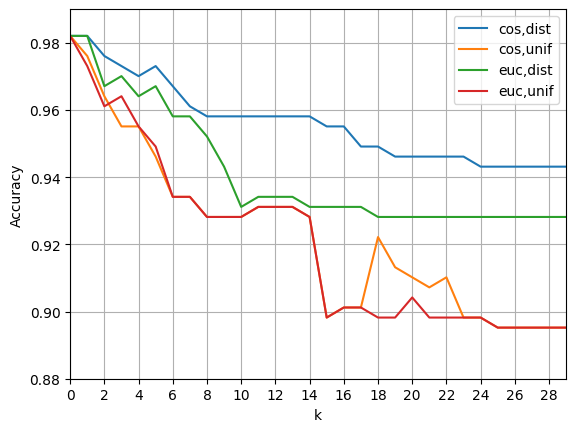

In [47]:
# accuracy[0][0] = accuracy[0][1]
# accuracy[1][0] = accuracy[1][1]
# accuracy[2][0] = accuracy[2][1]
# accuracy[3][0] = accuracy[3][1]
plt.plot(accuracy[0],label='cos,dist')
plt.plot(accuracy[1],label='cos,unif')
plt.plot(accuracy[2],label='euc,dist')
plt.plot(accuracy[3],label='euc,unif')
plt.axis([1, 30, 0.88, 0.99])
x_ax = np.arange(1, 30, 2)
my_xticks = np.arange(0, 30, 2)
plt.xticks(x_ax, my_xticks)
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.grid()
plt.legend()
plt.savefig("setK",dpi=300);
plt.show()

In [38]:
# train KNN, k=2

k=1
y_test = np.empty(0)
y_pred = np.empty(0)
y_prob = []


knn = KNeighborsClassifier(n_neighbors=k, metric='cosine', weights='distance')

#fold1
X_train1=trainF1.iloc [:, 1:6282].values
y_train1=trainF1.iloc[:, 0].values
X_test1=testF1.iloc [:, 1:6282].values
y_test1=testF1.iloc[:, 0].values

knn.fit(X_train1, y_train1)
y_pred1 = knn.predict(X_test1)
y_test = np.concatenate((y_test, y_test1))
y_pred = np.concatenate((y_pred, y_pred1))
#print(knn.predict_proba(X_test1))
y_prob.extend(knn.predict_proba(X_test1))

#fold2
X_train2=trainF2.iloc [:, 1:6282].values
y_train2=trainF2.iloc[:, 0].values
X_test2=testF2.iloc [:, 1:6282].values
y_test2=testF2.iloc[:, 0].values

knn.fit(X_train2, y_train2)
y_pred2 = knn.predict(X_test2)
y_test = np.concatenate((y_test, y_test2))
y_pred = np.concatenate((y_pred, y_pred2))
y_prob.extend(knn.predict_proba(X_test2))

#fold3
X_train3=trainF3.iloc [:, 1:6282].values
y_train3=trainF3.iloc[:, 0].values
X_test3=testF3.iloc [:, 1:6282].values
y_test3=testF3.iloc[:, 0].values

knn.fit(X_train3, y_train3)
y_pred3 = knn.predict(X_test3)
y_test = np.concatenate((y_test, y_test3))
y_pred = np.concatenate((y_pred, y_pred3))
y_prob.extend(knn.predict_proba(X_test3))

#fold4
X_train4=trainF4.iloc [:, 1:6282].values
y_train4=trainF4.iloc[:, 0].values
X_test4=testF4.iloc [:, 1:6282].values
y_test4=testF4.iloc[:, 0].values

knn.fit(X_train4, y_train4)
y_pred4 = knn.predict(X_test4)
y_test = np.concatenate((y_test, y_test4))
y_pred = np.concatenate((y_pred, y_pred4))
y_prob.extend(knn.predict_proba(X_test4))

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
    


[[ 411  107]
 [ 161 1945]]
              precision    recall  f1-score   support

         0.0       0.72      0.79      0.75       518
         1.0       0.95      0.92      0.94      2106

    accuracy                           0.90      2624
   macro avg       0.83      0.86      0.84      2624
weighted avg       0.90      0.90      0.90      2624



# SVM







# Linear

In [10]:

y_testsvml = np.empty(0)
y_predsvml = np.empty(0)
y_probsvml = []

clf = svm.SVC(kernel= 'linear', random_state=1,probability=True)

#F1
clf.fit(X_train1, y_train1) 
y_pred1 = clf.predict(X_test1)
y_predsvml = np.concatenate((y_predsvml, y_pred1))
y_probsvml.extend(clf.predict_proba(X_test1))
#F2
clf.fit(X_train2, y_train2) 
y_pred2 = clf.predict(X_test2)
y_predsvml = np.concatenate((y_predsvml, y_pred2))
y_probsvml.extend(clf.predict_proba(X_test2))
#F3
clf.fit(X_train3, y_train3) 
y_pred3 = clf.predict(X_test3)
y_predsvml = np.concatenate((y_predsvml, y_pred3))
y_probsvml.extend(clf.predict_proba(X_test3))
#F4
clf.fit(X_train4, y_train4) 
y_pred4 = clf.predict(X_test4)
y_predsvml = np.concatenate((y_predsvml, y_pred4))
y_probsvml.extend(clf.predict_proba(X_test4))

print(confusion_matrix(y_test, y_predsvml))
print(classification_report(y_test, y_predsvml))


# error=np.mean(y_pred2 != y_test2)
# score=metrics.accuracy_score(y_test2, y_pred2)
# score_list=metrics.accuracy_score(y_test2, y_pred2)
# print("SVM F1 Accuracy:",metrics.accuracy_score(y_test2, y_pred2), " error: ", np.mean(y_pred2 != y_test2))
# print(confusion_matrix(y_test2, y_pred2))
# print(classification_report(y_test2, y_pred2))
# cv_scores = cross_val_score(clf, X, y, cv=10)
# cv_mean_score=sum(cv_scores)/len(cv_scores)
#     # print(cv_scores)
# print('cv_scores mean:{}'.format(np.mean(cv_scores)))

[[ 362  156]
 [  82 2024]]
              precision    recall  f1-score   support

         0.0       0.82      0.70      0.75       518
         1.0       0.93      0.96      0.94      2106

    accuracy                           0.91      2624
   macro avg       0.87      0.83      0.85      2624
weighted avg       0.91      0.91      0.91      2624



# RBF

In [11]:

y_testsvmr = np.empty(0)
y_predsvmr = np.empty(0)
y_probsvmr = []

clf = svm.SVC(kernel= 'rbf', random_state=1,probability=True)

#F1
clf.fit(X_train1, y_train1) 
y_pred1 = clf.predict(X_test1)
y_predsvmr = np.concatenate((y_predsvmr, y_pred1))
y_probsvmr.extend(clf.predict_proba(X_test1))
#F2
clf.fit(X_train2, y_train2) 
y_pred2 = clf.predict(X_test2)
y_predsvmr = np.concatenate((y_predsvmr, y_pred2))
y_probsvmr.extend(clf.predict_proba(X_test2))
#F3
clf.fit(X_train3, y_train3) 
y_pred3 = clf.predict(X_test3)
y_predsvmr = np.concatenate((y_predsvmr, y_pred3))
y_probsvmr.extend(clf.predict_proba(X_test3))
#F4
clf.fit(X_train4, y_train4) 
y_pred4 = clf.predict(X_test4)
y_predsvmr = np.concatenate((y_predsvmr, y_pred4))
y_probsvmr.extend(clf.predict_proba(X_test4))

print(confusion_matrix(y_test, y_predsvmr))
print(classification_report(y_test, y_predsvmr))


[[ 320  198]
 [ 141 1965]]
              precision    recall  f1-score   support

         0.0       0.69      0.62      0.65       518
         1.0       0.91      0.93      0.92      2106

    accuracy                           0.87      2624
   macro avg       0.80      0.78      0.79      2624
weighted avg       0.87      0.87      0.87      2624



# poly

In [12]:

y_testsvmp = np.empty(0)
y_predsvmp = np.empty(0)
y_probsvmp = []

clf = svm.SVC(kernel= 'poly', random_state=1,probability=True)

#F1
clf.fit(X_train1, y_train1) 
y_pred1 = clf.predict(X_test1)
y_predsvmp = np.concatenate((y_predsvmp, y_pred1))
y_probsvmp.extend(clf.predict_proba(X_test1))
#F2
clf.fit(X_train2, y_train2) 
y_pred2 = clf.predict(X_test2)
y_predsvmp = np.concatenate((y_predsvmp, y_pred2))
y_probsvmp.extend(clf.predict_proba(X_test2))
#F3
clf.fit(X_train3, y_train3) 
y_pred3 = clf.predict(X_test3)
y_predsvmp = np.concatenate((y_predsvmp, y_pred3))
y_probsvmp.extend(clf.predict_proba(X_test3))
#F4
clf.fit(X_train4, y_train4) 
y_pred4 = clf.predict(X_test4)
y_predsvmp = np.concatenate((y_predsvmp, y_pred4))
y_probsvmp.extend(clf.predict_proba(X_test4))

print(confusion_matrix(y_test, y_predsvmp))
print(classification_report(y_test, y_predsvmp))


[[ 353  165]
 [ 115 1991]]
              precision    recall  f1-score   support

         0.0       0.75      0.68      0.72       518
         1.0       0.92      0.95      0.93      2106

    accuracy                           0.89      2624
   macro avg       0.84      0.81      0.83      2624
weighted avg       0.89      0.89      0.89      2624



# sigmoid

In [13]:

y_testsvms = np.empty(0)
y_predsvms = np.empty(0)
y_probsvms = []

clf = svm.SVC(kernel= 'sigmoid', random_state=1,probability=True)

#F1
clf.fit(X_train1, y_train1) 
y_pred1 = clf.predict(X_test1)
y_predsvms = np.concatenate((y_predsvms, y_pred1))
y_probsvms.extend(clf.predict_proba(X_test1))
#F2
clf.fit(X_train2, y_train2) 
y_pred2 = clf.predict(X_test2)
y_predsvms = np.concatenate((y_predsvms, y_pred2))
y_probsvms.extend(clf.predict_proba(X_test2))
#F3
clf.fit(X_train3, y_train3) 
y_pred3 = clf.predict(X_test3)
y_predsvms = np.concatenate((y_predsvms, y_pred3))
y_probsvms.extend(clf.predict_proba(X_test3))
#F4
clf.fit(X_train4, y_train4) 
y_pred4 = clf.predict(X_test4)
y_predsvms = np.concatenate((y_predsvms, y_pred4))
y_probsvms.extend(clf.predict_proba(X_test4))

print(confusion_matrix(y_test, y_predsvms))
print(classification_report(y_test, y_predsvms))

[[ 228  290]
 [ 247 1859]]
              precision    recall  f1-score   support

         0.0       0.48      0.44      0.46       518
         1.0       0.87      0.88      0.87      2106

    accuracy                           0.80      2624
   macro avg       0.67      0.66      0.67      2624
weighted avg       0.79      0.80      0.79      2624



# XGBoost

In [14]:

y_testxgb = np.empty(0)
y_predxgb = np.empty(0)
y_probxgb = []


model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

#F1
model.fit(X_train1, y_train1)
y_pred1 = model.predict(X_test1)
y_predxgb = np.concatenate((y_predxgb, y_pred1))
y_probxgb.extend(model.predict_proba(X_test1))
#F2
model.fit(X_train2, y_train2)
y_pred2 = model.predict(X_test2)
y_predxgb = np.concatenate((y_predxgb, y_pred2))
y_probxgb.extend(model.predict_proba(X_test2))
#F1
model.fit(X_train3, y_train3)
y_pred3 = model.predict(X_test3)
y_predxgb = np.concatenate((y_predxgb, y_pred3))
y_probxgb.extend(model.predict_proba(X_test3))
#F4
model.fit(X_train4, y_train4)
y_pred4 = model.predict(X_test4)
y_predxgb = np.concatenate((y_predxgb, y_pred4))
y_probxgb.extend(model.predict_proba(X_test4))


print(confusion_matrix(y_test, y_predxgb))
print(classification_report(y_test, y_predxgb))

[[ 422   96]
 [  82 2024]]
              precision    recall  f1-score   support

         0.0       0.84      0.81      0.83       518
         1.0       0.95      0.96      0.96      2106

    accuracy                           0.93      2624
   macro avg       0.90      0.89      0.89      2624
weighted avg       0.93      0.93      0.93      2624



# Random Forest

In [15]:

y_testrf = np.empty(0)
y_predrf = np.empty(0)
y_probrf = []


rf = RandomForestClassifier(random_state=1,n_estimators=10000)

#F1
rf.fit(X_train1, y_train1)
y_pred1 = rf.predict(X_test1)
y_predrf = np.concatenate((y_predrf, y_pred1))
y_probrf.extend(rf.predict_proba(X_test1))
#F2
rf.fit(X_train2, y_train2)
y_pred2 = rf.predict(X_test2)
y_predrf = np.concatenate((y_predrf, y_pred2))
y_probrf.extend(rf.predict_proba(X_test2))
#F3
rf.fit(X_train3, y_train3)
y_pred3 = rf.predict(X_test3)
y_predrf = np.concatenate((y_predrf, y_pred3))
y_probrf.extend(rf.predict_proba(X_test3))
#F4
rf.fit(X_train4, y_train4)
y_pred4 = rf.predict(X_test4)
y_predrf = np.concatenate((y_predrf, y_pred4))
y_probrf.extend(rf.predict_proba(X_test4))

print(confusion_matrix(y_test, y_predrf))
print(classification_report(y_test, y_predrf))

[[ 365  153]
 [ 104 2002]]
              precision    recall  f1-score   support

         0.0       0.78      0.70      0.74       518
         1.0       0.93      0.95      0.94      2106

    accuracy                           0.90      2624
   macro avg       0.85      0.83      0.84      2624
weighted avg       0.90      0.90      0.90      2624



# ROC curve knn



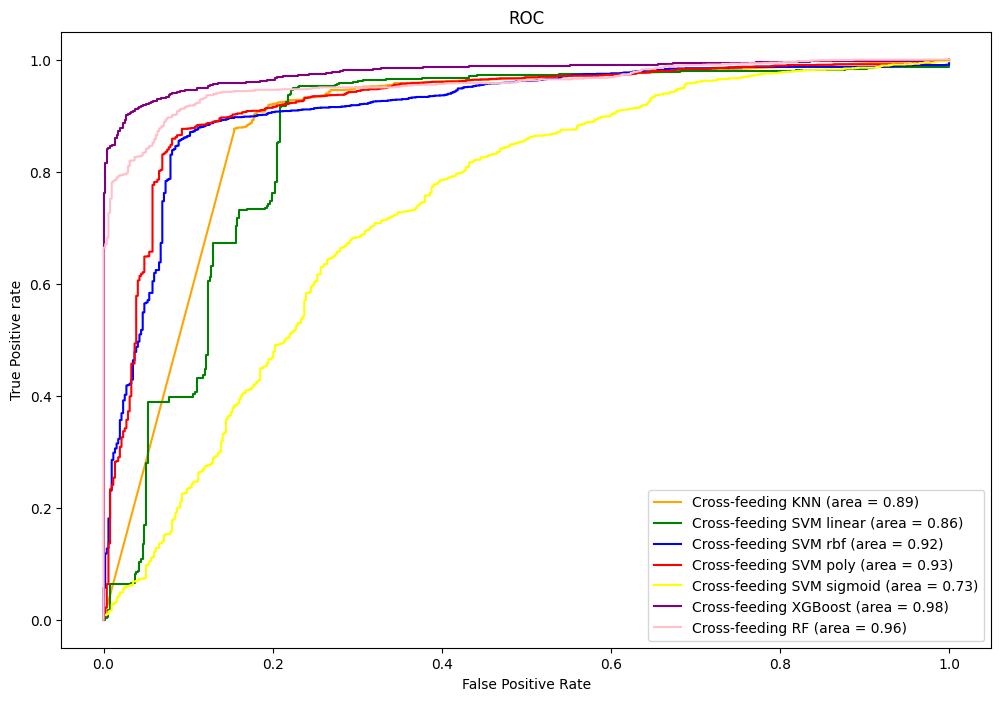

In [16]:
##Plot roc
n_class=2
fpr={}
tpr={}
roc_auc={}
thresh={}
yprob = np.array(y_prob)
fprsvml={}
tprsvml={}
roc_aucsvml={}
threshsvml={}
yprobsvml = np.array(y_probsvml)
fprsvmr={}
tprsvmr={}
roc_aucsvmr={}
threshsvmr={}
yprobsvmr = np.array(y_probsvmr)
fprsvmp={}
tprsvmp={}
roc_aucsvmp={}
threshsvmp={}
yprobsvmp = np.array(y_probsvmp)
fprsvms={}
tprsvms={}
roc_aucsvms={}
threshsvms={}
yprobsvms = np.array(y_probsvms)
fprxgb={}
tprxgb={}
roc_aucxgb={}
threshxgb={}
yprobxgb = np.array(y_probxgb)
fprrf={}
tprrf={}
roc_aucrf={}
threshrf={}
yprobrf = np.array(y_probrf)

##Para cada i en rango 0, 1 calculo el fpr y el tpr, tambien calculo auc por clase
for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, yprob[:,i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])
    fprsvml[i], tprsvml[i], threshsvml[i] = roc_curve(y_test, yprobsvml[:,i], pos_label=i)
    roc_aucsvml[i] = auc(fprsvml[i], tprsvml[i])
    fprsvmr[i], tprsvmr[i], threshsvmr[i] = roc_curve(y_test, yprobsvmr[:,i], pos_label=i)
    roc_aucsvmr[i] = auc(fprsvmr[i], tprsvmr[i])
    fprsvmp[i], tprsvmp[i], threshsvmp[i] = roc_curve(y_test, yprobsvmp[:,i], pos_label=i)
    roc_aucsvmp[i] = auc(fprsvmp[i], tprsvmp[i])
    fprsvms[i], tprsvms[i], threshsvms[i] = roc_curve(y_test, yprobsvms[:,i], pos_label=i)
    roc_aucsvms[i] = auc(fprsvms[i], tprsvms[i])
    fprxgb[i], tprxgb[i], threshxgb[i] = roc_curve(y_test, yprobxgb[:,i], pos_label=i)
    roc_aucxgb[i] = auc(fprxgb[i], tprxgb[i])
    fprrf[i], tprrf[i], threshrf[i] = roc_curve(y_test, yprobrf[:,i], pos_label=i)
    roc_aucrf[i] = auc(fprrf[i], tprrf[i])

plt.figure(figsize=(12, 8))
# plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Competence (area = %0.2f)' % roc_auc[0])
plt.plot(fpr[1], tpr[1], linestyle='-',color='orange', label='Cross-feeding KNN (area = %0.2f)' % roc_auc[1])

# plt.plot(fprsvml[0], tprsvml[0], linestyle='--',color='green', label='Competence (area = %0.2f)' % roc_aucsvml[0])
plt.plot(fprsvml[1], tprsvml[1], linestyle='-',color='green', label='Cross-feeding SVM linear (area = %0.2f)' % roc_aucsvml[1])

# plt.plot(fprsvmr[0], tprsvmr[0], linestyle='--',color='blue', label='Competence (area = %0.2f)' % roc_aucsvmr[0])
plt.plot(fprsvmr[1], tprsvmr[1], linestyle='-',color='blue', label='Cross-feeding SVM rbf (area = %0.2f)' % roc_aucsvmr[1])

# plt.plot(fprsvmp[0], tprsvmp[0], linestyle='--',color='red', label='Competence (area = %0.2f)' % roc_aucsvmp[0])
plt.plot(fprsvmp[1], tprsvmp[1], linestyle='-',color='red', label='Cross-feeding SVM poly (area = %0.2f)' % roc_aucsvmp[1])

# plt.plot(fprsvms[0], tprsvms[0], linestyle='--',color='yellow', label='Competence (area = %0.2f)' % roc_aucsvms[0])
plt.plot(fprsvms[1], tprsvms[1], linestyle='-',color='yellow', label='Cross-feeding SVM sigmoid (area = %0.2f)' % roc_aucsvms[1])

# plt.plot(fprxgb[0], tprxgb[0], linestyle='--',color='purple', label='Competence (area = %0.2f)' % roc_aucxgb[0])
plt.plot(fprxgb[1], tprxgb[1], linestyle='-',color='purple', label='Cross-feeding XGBoost (area = %0.2f)' % roc_aucxgb[1])

# plt.plot(fprrf[0], tprrf[0], linestyle='--',color='pink', label='Competence (area = %0.2f)' % roc_aucrf[0])
plt.plot(fprrf[1], tprrf[1], linestyle='-',color='pink', label='Cross-feeding RF (area = %0.2f)' % roc_aucrf[1])

plt.title("ROC")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')

plt.savefig("ROC",dpi=300);

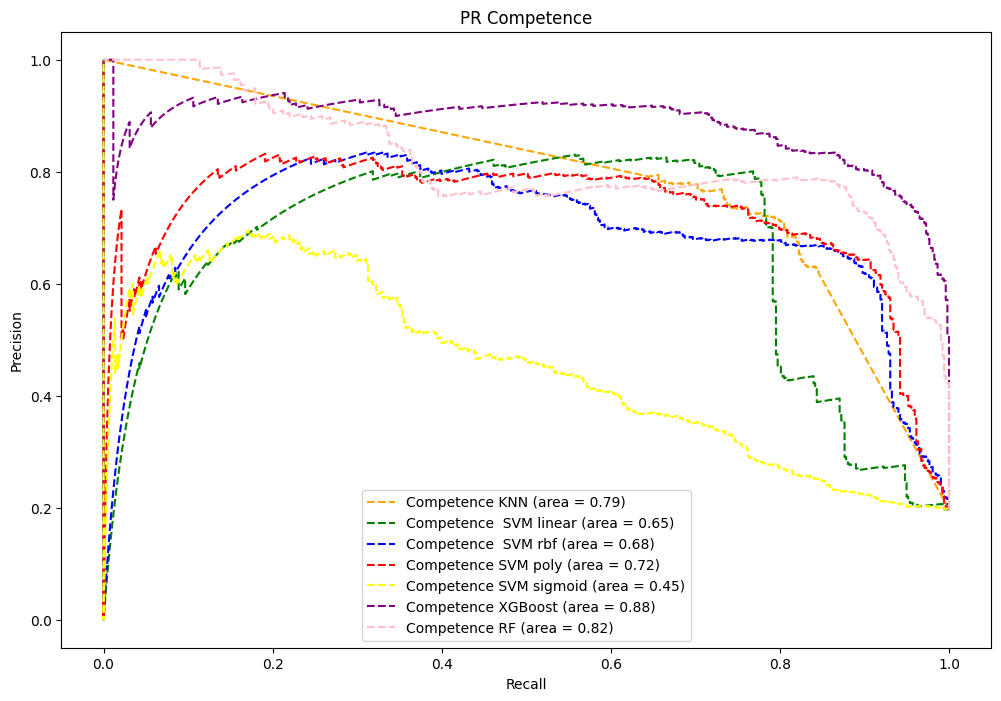

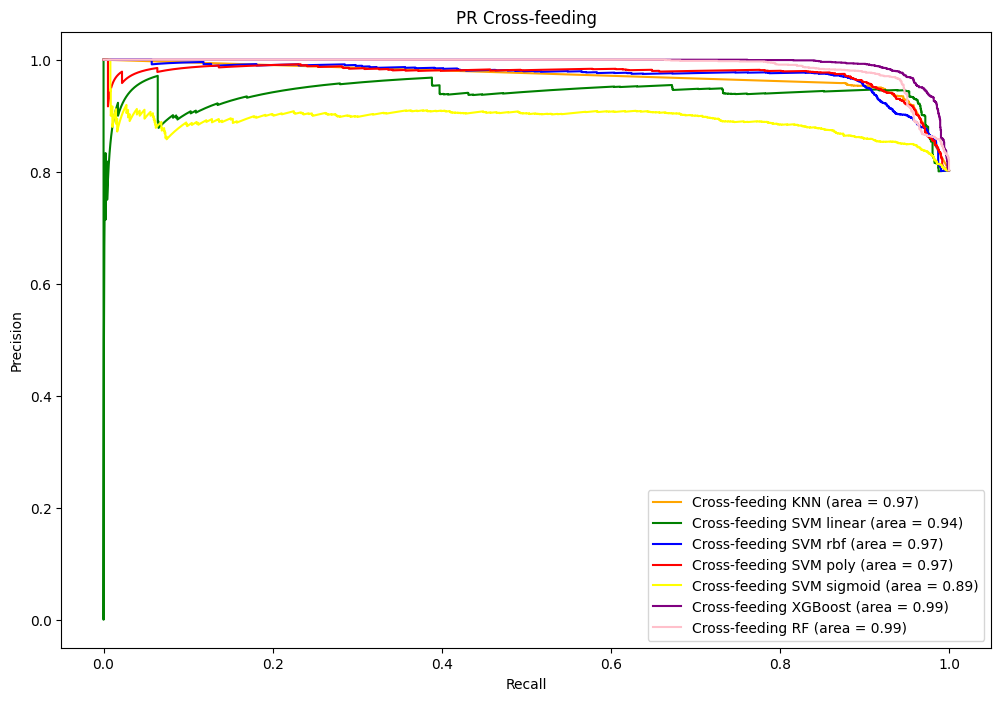

In [31]:
#calculate precision and recall
p={}
r={}
pr_auc={}
thres={}
psvml={}
rsvml={}
pr_aucsvml={}
thressvml={}
psvmr={}
rsvmr={}
pr_aucsvmr={}
thressvmr={}
psvmp={}
rsvmp={}
pr_aucsvmp={}
threshsvmp={}
psvms={}
rsvms={}
pr_aucsvms={}
threshsvms={}
pxgb={}
rxgb={}
pr_aucxgb={}
threshxgb={}
prf={}
rrf={}
pr_aucrf={}
threshrf={}

##calculate p & r.
for i in range(n_class):    
    p[i], r[i], thres[i] = precision_recall_curve(y_test, yprob[:,i], pos_label=i)
    pr_auc[i]=auc(r[i], p[i])
    psvml[i], rsvml[i], thressvml[i] = precision_recall_curve(y_test, yprobsvml[:,i], pos_label=i)
    pr_aucsvml[i]=auc(rsvml[i], psvml[i])
    psvmr[i], rsvmr[i], thressvmr[i] = precision_recall_curve(y_test, yprobsvmr[:,i], pos_label=i)
    pr_aucsvmr[i]=auc(rsvmr[i], psvmr[i])
    psvmp[i], rsvmp[i], threshsvmp[i] = precision_recall_curve(y_test, yprobsvmp[:,i], pos_label=i)
    pr_aucsvmp[i] = auc(rsvmp[i], psvmp[i])
    psvms[i], rsvms[i], threshsvms[i] = precision_recall_curve(y_test, yprobsvms[:,i], pos_label=i)
    pr_aucsvms[i] = auc(rsvms[i], psvms[i])
    pxgb[i], rxgb[i], threshxgb[i] = precision_recall_curve(y_test, yprobxgb[:,i], pos_label=i)
    pr_aucxgb[i] = auc(rxgb[i], pxgb[i])
    prf[i], rrf[i], threshrf[i] = precision_recall_curve(y_test, yprobrf[:,i], pos_label=i)
    pr_aucrf[i] = auc(rrf[i], prf[i])
    
plt.figure(figsize=(12, 8))
plt.plot(r[0], p[0], linestyle='--',color='orange', label='Competence KNN (area = %0.2f)' % pr_auc[0])
# plt.plot(r[1], p[1], linestyle='-',color='orange', label='Cross-feeding KNN (area = %0.2f)' % pr_auc[1])

plt.plot(rsvml[0], psvml[0], linestyle='--',color='green', label='Competence  SVM linear (area = %0.2f)' % pr_aucsvml[0])
# plt.plot(rsvml[1], psvml[1], linestyle='-',color='green', label='Cross-feeding SVM linear (area = %0.2f)' % pr_aucsvml[1])

plt.plot(rsvmr[0], psvmr[0], linestyle='--',color='blue', label='Competence  SVM rbf (area = %0.2f)' % pr_aucsvmr[0])
# plt.plot(rsvmr[1], psvmr[1], linestyle='-',color='blue', label='Cross-feeding SVM rbf (area = %0.2f)' % pr_aucsvmr[1])

plt.plot(rsvmp[0], psvmp[0], linestyle='--',color='red', label='Competence SVM poly (area = %0.2f)' % pr_aucsvmp[0])
# plt.plot(rsvmp[1], psvmp[1], linestyle='-',color='red', label='Cross-feeding SVM poly (area = %0.2f)' % pr_aucsvmp[1])

plt.plot(rsvms[0], psvms[0], linestyle='--',color='yellow', label='Competence SVM sigmoid (area = %0.2f)' % pr_aucsvms[0])
# plt.plot(rsvms[1], psvms[1], linestyle='-',color='yellow', label='Cross-feeding SVM sigmoid (area = %0.2f)' % pr_aucsvms[1])

plt.plot(rxgb[0], pxgb[0], linestyle='--',color='purple', label='Competence XGBoost (area = %0.2f)' % pr_aucxgb[0])
# plt.plot(rxgb[1], pxgb[1], linestyle='-',color='purple', label='Cross-feeding XGBoost (area = %0.2f)' % pr_aucxgb[1])

plt.plot(rrf[0], prf[0], linestyle='--',color='pink', label='Competence RF (area = %0.2f)' % pr_aucrf[0])
# plt.plot(rrf[1], prf[1], linestyle='-',color='pink', label='Cross-feeding RF (area = %0.2f)' % pr_aucrf[1])




plt.title('PR Competence')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='best')
plt.savefig('PR_comp',dpi=300); 

# # Python code to sort the tuples using second element 
# # of sublist Inplace way to sort using sort()
# def Sort(sub_li):
  
#     # reverse = None (Sorts in Ascending order)
#     # key is set to sort using second element of 
#     # sublist lambda has been used
#     sub_li.sort(key = lambda x: x[1])
#     return sub_li

# tmpxgb = []
# for i in range(len(rxgb[0])):
#     tmpxgb.extend([rxgb[0][i],pxgb[0][i]])
#     #print([rxgb[0][i],pxgb[0][i]])
# print(tmpxgb)
# Sort(tmpxgb)
# print(tmpxgb)
# for i in range(len(rxgb[1])):
#     rxgb[0][i] = tmpxgb[0][i] 
#     pxgb[0][i] = tmpxgb[1][i]

plt.figure(figsize=(12, 8))
# plt.plot(r[0], p[0], linestyle='--',color='orange', label='Competence KNN (area = %0.2f)' % pr_auc[0])
plt.plot(r[1], p[1], linestyle='-',color='orange', label='Cross-feeding KNN (area = %0.2f)' % pr_auc[1])

# plt.plot(rsvml[0], psvml[0], linestyle='--',color='green', label='Competence  SVM linear (area = %0.2f)' % pr_aucsvml[0])
plt.plot(rsvml[1], psvml[1], linestyle='-',color='green', label='Cross-feeding SVM linear (area = %0.2f)' % pr_aucsvml[1])

# plt.plot(rsvmr[0], psvmr[0], linestyle='--',color='blue', label='Competence  SVM rbf (area = %0.2f)' % pr_aucsvmr[0])
plt.plot(rsvmr[1], psvmr[1], linestyle='-',color='blue', label='Cross-feeding SVM rbf (area = %0.2f)' % pr_aucsvmr[1])

# plt.plot(rsvmp[0], psvmp[0], linestyle='--',color='red', label='Competence SVM poly (area = %0.2f)' % pr_aucsvmp[0])
plt.plot(rsvmp[1], psvmp[1], linestyle='-',color='red', label='Cross-feeding SVM poly (area = %0.2f)' % pr_aucsvmp[1])

# plt.plot(rsvms[0], psvms[0], linestyle='--',color='yellow', label='Competence SVM sigmoid (area = %0.2f)' % pr_aucsvms[0])
plt.plot(rsvms[1], psvms[1], linestyle='-',color='yellow', label='Cross-feeding SVM sigmoid (area = %0.2f)' % pr_aucsvms[1])

# plt.plot(rxgb[0], pxgb[0], linestyle='--',color='purple', label='Competence XGBoost (area = %0.2f)' % pr_aucxgb[0])
plt.plot(rxgb[1], pxgb[1], linestyle='-',color='purple', label='Cross-feeding XGBoost (area = %0.2f)' % pr_aucxgb[1])

# plt.plot(rrf[0], prf[0], linestyle='--',color='pink', label='Competence RF (area = %0.2f)' % pr_aucrf[0])
plt.plot(rrf[1], prf[1], linestyle='-',color='pink', label='Cross-feeding RF (area = %0.2f)' % pr_aucrf[1])




plt.title('PR Cross-feeding')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='best')
plt.savefig('PR_cross',dpi=300); 

In [46]:
print('Algorithm', 'ROC AUC_co', 'ROC AUC_cf', 'PR AUC_co', 'PR AUC_cf',sep="\t")
print('KNN',roc_auc[0],roc_auc[1],pr_auc[0],pr_auc[1],sep="\t")
print('SVM linear',roc_aucsvml[0],roc_aucsvml[1],pr_aucsvml[0],pr_aucsvml[1],sep="\t")
print('SVM RBF',roc_aucsvmr[0],roc_aucsvmr[1],pr_aucsvmr[0],pr_aucsvmr[1],sep="\t")
print('SVM polynomial',roc_aucsvmp[0],roc_aucsvmp[1],pr_aucsvmp[0],pr_aucsvmp[1],sep="\t")
print('SVM sigmoid',roc_aucsvms[0],roc_aucsvms[1],pr_aucsvms[0],pr_aucsvms[1],sep="\t")
print('XGBoost',roc_aucxgb[0],roc_aucxgb[1],pr_aucxgb[0],pr_aucxgb[1],sep="\t")
print('RF',roc_aucrf[0],roc_aucrf[1],pr_aucrf[0],pr_aucrf[1],sep="\t")

Algorithm	ROC AUC_co	ROC AUC_cf	PR AUC_co	PR AUC_cf
KNN	0.885688802355469	0.885688802355469	0.7881604440507017	0.9712311042440531
SVM linear	0.8638977805644473	0.8638977805644473	0.648962399597315	0.9379558025542869
SVM RBF	0.9153347486680821	0.9153347486680821	0.6802664582715212	0.9741724945012378
SVM polynomial	0.9251100917767584	0.9251100917767585	0.722532618907555	0.9742127551787887
SVM sigmoid	0.7344652344652345	0.7344652344652345	0.44946916053391833	0.8924861551144528
XGBoost	0.9783840617173951	0.9783840617173952	0.8847477579438392	0.9949893435408343
RF	0.9575271241937908	0.9575271241937908	0.8159609147659821	0.9900574328922127


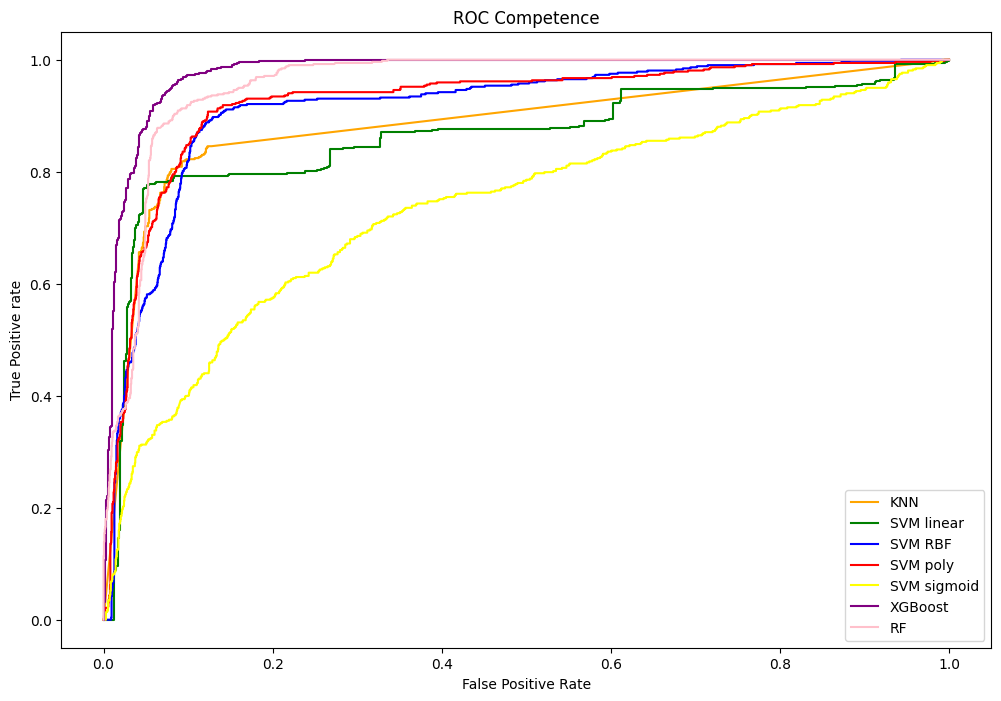

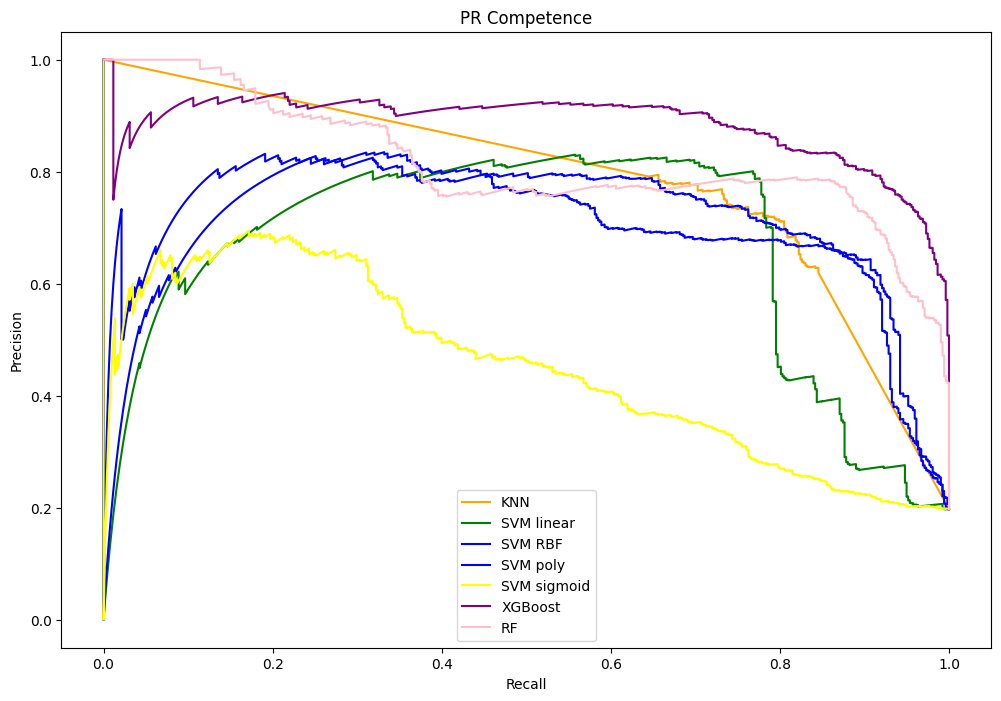

In [51]:

plt.figure(figsize=(12, 8))
plt.plot(fpr[0], tpr[0], linestyle='-',color='orange', label='KNN' % roc_auc[0])
plt.plot(fprsvml[0], tprsvml[0], linestyle='-',color='green', label='SVM linear' % roc_aucsvml[0])
plt.plot(fprsvmr[0], tprsvmr[0], linestyle='-',color='blue', label='SVM RBF' % roc_aucsvmr[0])
plt.plot(fprsvmp[0], tprsvmp[0], linestyle='-',color='red', label='SVM poly' % roc_aucsvmp[0])
plt.plot(fprsvms[0], tprsvms[0], linestyle='-',color='yellow', label='SVM sigmoid' % roc_aucsvms[0])
plt.plot(fprxgb[0], tprxgb[0], linestyle='-',color='purple', label='XGBoost' % roc_aucxgb[0])
plt.plot(fprrf[0], tprrf[0], linestyle='-',color='pink', label='RF' % roc_aucrf[0])

plt.title("ROC Competence")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')

plt.savefig("ROCco",dpi=300);

plt.figure(figsize=(12, 8))
plt.plot(r[0], p[0], linestyle='-',color='orange', label='KNN')
plt.plot(rsvml[0], psvml[0], linestyle='-',color='green', label='SVM linear')
plt.plot(rsvmr[0], psvmr[0], linestyle='-',color='blue', label='SVM RBF')
plt.plot(rsvmp[0], psvmp[0], linestyle='-',color='blue', label='SVM poly')
plt.plot(rsvms[0], psvms[0], linestyle='-',color='yellow', label='SVM sigmoid')
plt.plot(rxgb[0], pxgb[0], linestyle='-',color='purple', label='XGBoost')
plt.plot(rrf[0], prf[0], linestyle='-',color='pink', label='RF')




plt.title('PR Competence')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='best')
plt.savefig('PRco',dpi=300); 
